### Import libraries

In [1]:
import obspy as obs
import numpy as np
import matplotlib.pyplot as plt

from andbro__querrySeismoData import __querrySeismoData
from andbro__get_timeaxis import __get_timeaxis

In [22]:
def __get_stream(config):

    from andbro__create_empty_traces import __create_empty_traces
    
    st = obs.Stream()

    for i in range(len(config.get("sta"))):

        seed = f'{config.get("net")[i]}.{config.get("sta")[i]}.{config.get("loc")}.{config.get("cha")}'

        print(f"loading {seed}...")
        try:
            st0, inv = __querrySeismoData(  
                                        seed_id=seed,
                                        starttime=config.get("tbeg"),
                                        endtime=config.get("tend"),
                                        repository=config.get("repository"),
                                        path=None,
                                        restitute=True,
                                        detail=None,
                                        fill_value=None,
                                        )
            if len(st0) == 1:
                st += st0
            elif len(st0) > 1:
                st += st0.merge()
                
        except:
            print(f" -> failed to load {seed}!")
            print(f" -> substituted {seed_id} with NaN values! ")
            st_empty = obs.Stream()
            st_empty.append(__empty_trace(config, seed_id))
            st += st_empty

    return st

### Configurations

In [23]:
config = {}

config['tbeg'] = obs.UTCDateTime("2021-09-27 06:17")
config['tend'] = obs.UTCDateTime("2021-09-27 06:45")

config['sta'] = ['GELB','GRMB','BIB','TON', 'ALFT', 'FFB1', 'FFB2', 'FFB3', 'FUR']
config['net'] = ['BW','BW','BW','BW','BW','BW','BW','BW','GR']
config['loc'] = ''
config['cha'] = 'BHZ'

config['repository'] = "jane"

config['event'] = {'t0':'2021-09-27 06:17', 'lat':35.252 , 'lon':25.259}

In [24]:
st = __get_stream(config)

loading BW.GELB..BHZ...
loading BW.GRMB..BHZ...
loading BW.BIB..BHZ...
loading BW.TON..BHZ...
loading BW.ALFT..BHZ...
loading BW.FFB1..BHZ...
loading BW.FFB2..BHZ...
loading BW.FFB3..BHZ...
loading GR.FUR..BHZ...


### Remove traces with no coordinates

In [14]:
for i, tr in enumerate(st): 
    try: 
        tr.stats.coordinates;
    except:
        st.remove(tr);
        
print(st);

9 Trace(s) in Stream:
BW.GELB..BHZ | 2021-09-27T06:16:59.997500Z - 2021-09-27T06:44:59.997500Z | 20.0 Hz, 33601 samples
BW.GRMB..BHZ | 2021-09-27T06:17:00.012500Z - 2021-09-27T06:45:00.012500Z | 20.0 Hz, 33601 samples
BW.BIB..BHZ  | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.TON..BHZ  | 2021-09-27T06:16:59.997500Z - 2021-09-27T06:44:59.997500Z | 20.0 Hz, 33601 samples
BW.ALFT..BHZ | 2021-09-27T06:17:00.017500Z - 2021-09-27T06:45:00.017500Z | 20.0 Hz, 33601 samples
BW.FFB1..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.FFB2..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.FFB3..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
GR.FUR..BHZ  | 2021-09-27T06:16:59.990000Z - 2021-09-27T06:44:59.990000Z | 20.0 Hz, 33601 samples


### Add distance to event

In [15]:
from obspy.geodetics import gps2dist_azimuth     

for tr in st:
    tr.stats.distance = gps2dist_azimuth(tr.stats.coordinates.latitude, 
                                         tr.stats.coordinates.longitude,
                                         config.get("event").get("lat"),
                                         config.get("event").get("lon"),
                                        )[0]
st

9 Trace(s) in Stream:
BW.GELB..BHZ | 2021-09-27T06:16:59.997500Z - 2021-09-27T06:44:59.997500Z | 20.0 Hz, 33601 samples
BW.GRMB..BHZ | 2021-09-27T06:17:00.012500Z - 2021-09-27T06:45:00.012500Z | 20.0 Hz, 33601 samples
BW.BIB..BHZ  | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.TON..BHZ  | 2021-09-27T06:16:59.997500Z - 2021-09-27T06:44:59.997500Z | 20.0 Hz, 33601 samples
BW.ALFT..BHZ | 2021-09-27T06:17:00.017500Z - 2021-09-27T06:45:00.017500Z | 20.0 Hz, 33601 samples
BW.FFB1..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.FFB2..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.FFB3..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
GR.FUR..BHZ  | 2021-09-27T06:16:59.990000Z - 2021-09-27T06:44:59.990000Z | 20.0 Hz, 33601 samples

In [16]:
st.remove(st.select(station="BIB")[0])

8 Trace(s) in Stream:
BW.GELB..BHZ | 2021-09-27T06:16:59.997500Z - 2021-09-27T06:44:59.997500Z | 20.0 Hz, 33601 samples
BW.GRMB..BHZ | 2021-09-27T06:17:00.012500Z - 2021-09-27T06:45:00.012500Z | 20.0 Hz, 33601 samples
BW.TON..BHZ  | 2021-09-27T06:16:59.997500Z - 2021-09-27T06:44:59.997500Z | 20.0 Hz, 33601 samples
BW.ALFT..BHZ | 2021-09-27T06:17:00.017500Z - 2021-09-27T06:45:00.017500Z | 20.0 Hz, 33601 samples
BW.FFB1..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.FFB2..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
BW.FFB3..BHZ | 2021-09-27T06:17:00.000000Z - 2021-09-27T06:45:00.000000Z | 40.0 Hz, 67201 samples
GR.FUR..BHZ  | 2021-09-27T06:16:59.990000Z - 2021-09-27T06:44:59.990000Z | 20.0 Hz, 33601 samples

### Plotting

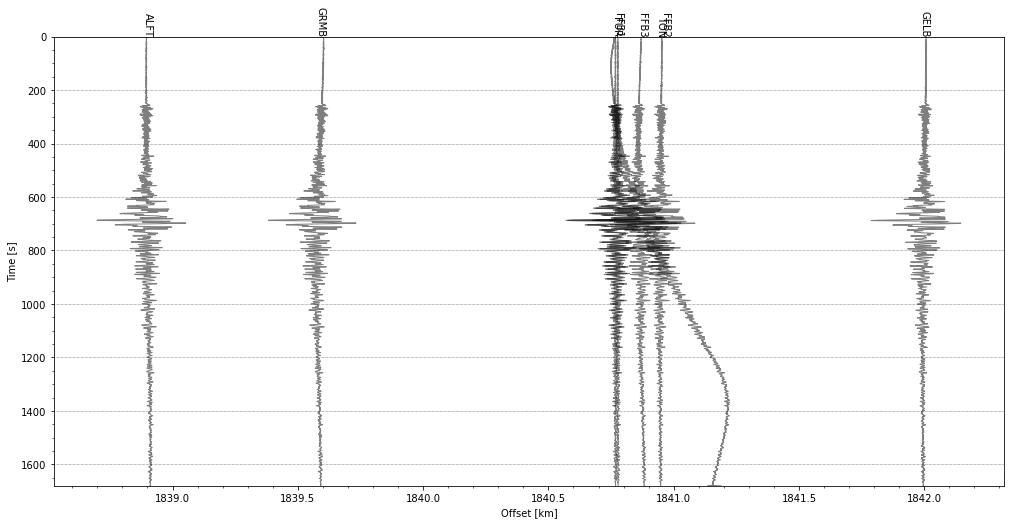

In [17]:
fig = plt.figure(figsize=(15,8))
st.plot(type="section", 
#         dist_degree=True, 
#         ev_coord=(config.get("event").get("lat"),config.get("event").get("lon")),
        norm_method='stream',
        time_down=True,
        show=False,
        fig=fig,
        );

from matplotlib.transforms import blended_transform_factory

ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in st:
    ax.text(tr.stats.distance / 1e3, 1.0, tr.stats.station, rotation=270,
            va="bottom", ha="center", transform=transform, zorder=10)
plt.show();

## Compare RLAS, ROMY-Z, ADR and FFB1

### Configurations

In [18]:
config2 = {}

config2['tbeg'] = obs.UTCDateTime("2021-09-27 06:17")
config2['tend'] = obs.UTCDateTime("2021-09-27 06:40")

config2['seeds'] = {#'FUR': 'GR.FUR..BHZ',
                    'FFB1':'BW.FFB1..BHZ', 
                    'RLAS':'BW.RLAS..BJZ', 
                    'ROMY':'BW.ROMY.10.BJZ', 
                    'ADRZ':'BW.ROMY.20.BSZ',
                   }

config2['filter'] = {'type':'bandpass', 'fmin': 0.01, 'fmax': 0.2}

config2['repository'] = ["online", "online", "archive", "archive", "archive"]

### Load data

In [19]:
def __get_stream(config):
    
    st = obs.Stream()

    for i, seed in enumerate(config.get("seeds").keys()):

        seed = config.get("seeds")[seed]

        print(f"loading {seed}...")

        st0, inv = __querrySeismoData(  
                                    seed_id=seed,
                                    starttime=config.get("tbeg"),
                                    endtime=config.get("tend"),
                                    where=config.get("repository")[i],
                                    path=None,
                                    restitute=True,
                                    detail=None,
                                    fill_value=None,
                                    )
        if st0[0].stats.channel == "BSZ":
            st0[0].stats.station ="ADRZ"
        if len(st0) != 0:
            st += st0
    return st

st0 = __get_stream(config2)

loading BW.FFB1..BHZ...


TypeError: __querrySeismoData() got an unexpected keyword argument 'where'

### Processing

In [20]:
st = st0.copy();

st.trim(starttime=config2.get("tbeg"), endtime=config2.get("tend"));

st.detrend('demean');

for tr in st:
    if tr.stats.sampling_rate > 20:
        tr.resample(20);
        
if config2['filter']:
    st.filter(config2['filter']['type'], 
              freqmin=config2['filter']['fmin'],
              freqmax=config2['filter']['fmax'], 
              corners=4, 
              zerophase=True);
print(st);

NameError: name 'st0' is not defined

/home/brotzer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


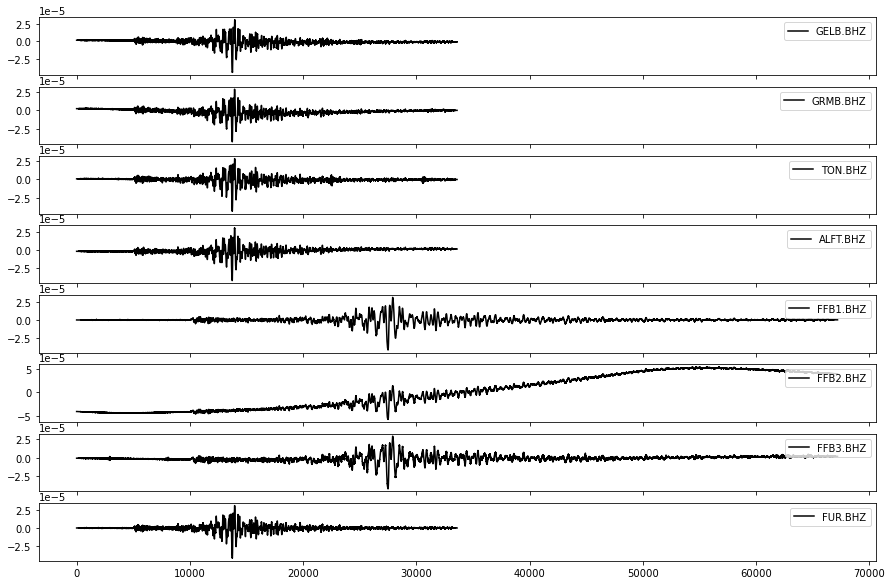

In [21]:
fig, ax = plt.subplots(len(st),1, figsize=(15,10), sharex=True)

for i, tr in enumerate(st):
    ax[i].plot(tr.data, color='k', label=f'{tr.stats.station}.{tr.stats.channel}');
    ax[i].legend(loc="upper right")
    
fig.show();

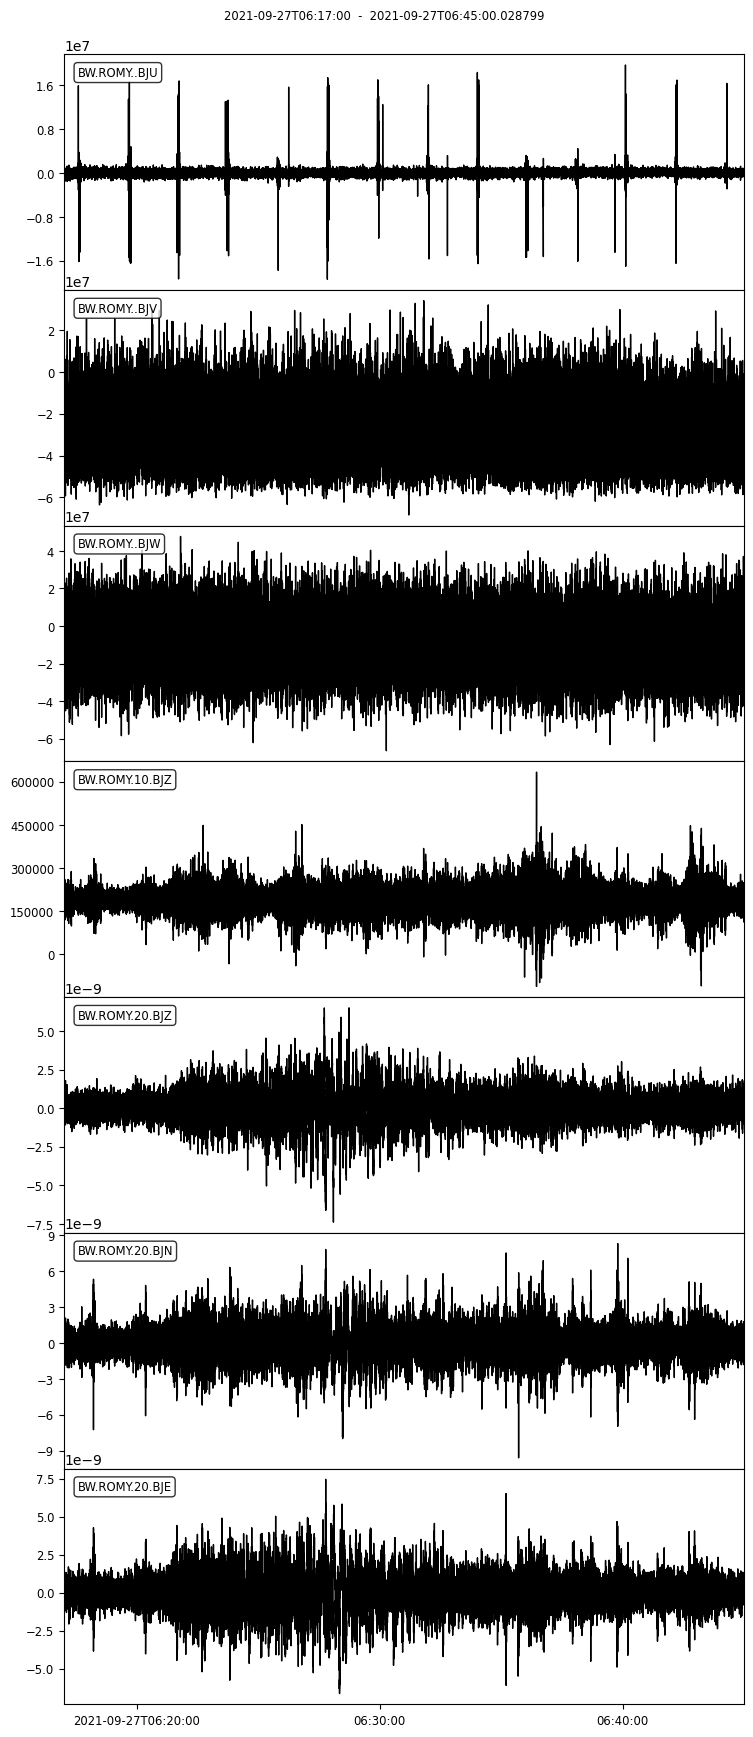

In [39]:
seed = "BW.ROMY.*.BJ*"

st0, inv0 = __querrySeismoData(
                            seed_id=seed,
                            starttime=config.get("tbeg"),
                            endtime=config.get("tend"),
                            repository="george",
                            path=None,
                            restitute=False,
                            detail=None,
                            )

inv0.write(f"/home/brotzer/Desktop/{seed.split('.')[1]}.xml", format="stationxml", validate=True)


st0.plot(equal_scale=False);

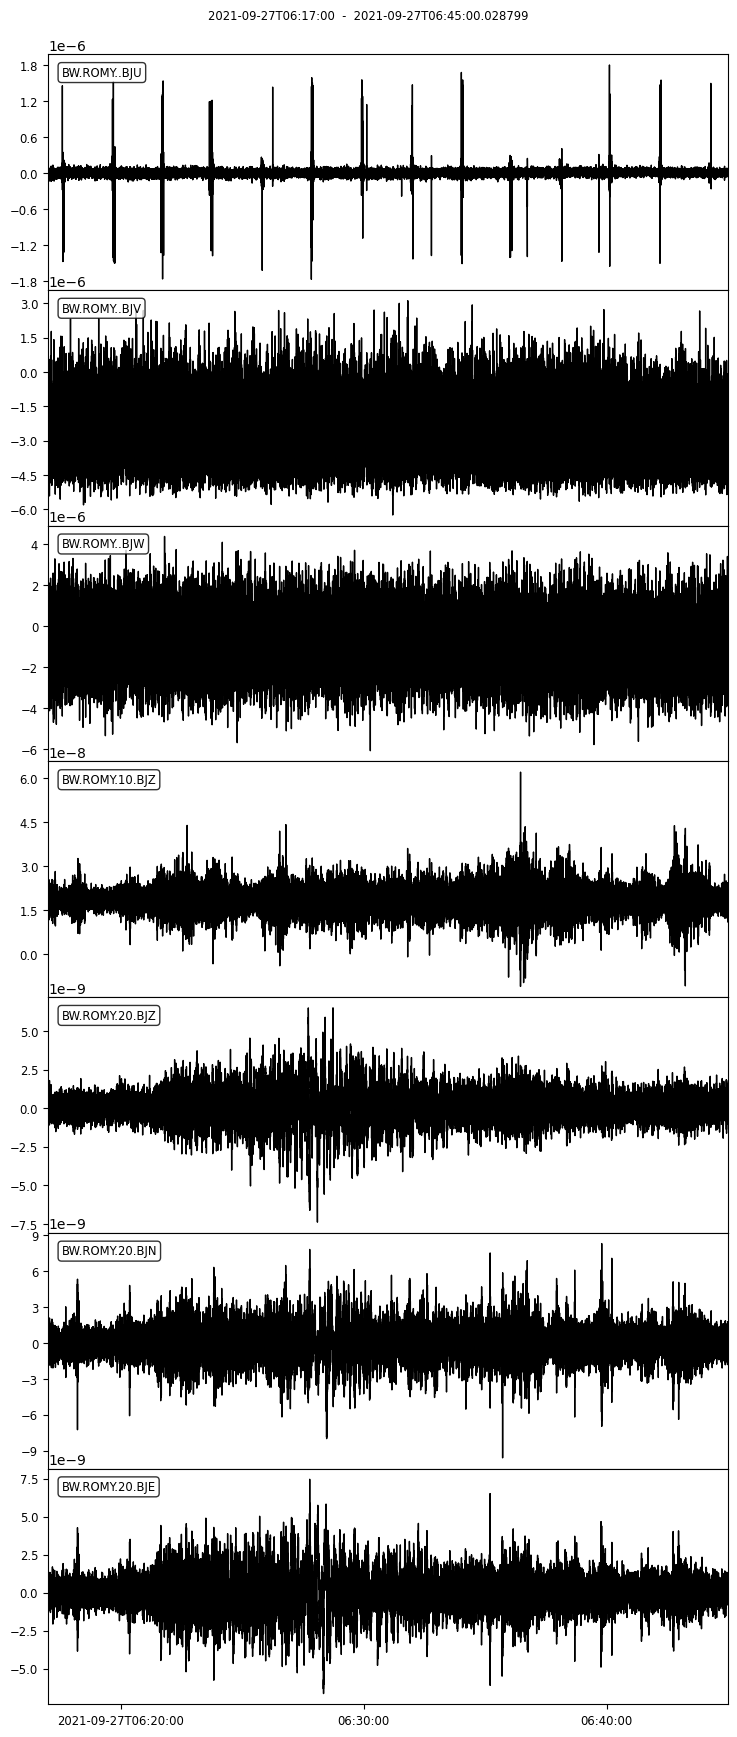

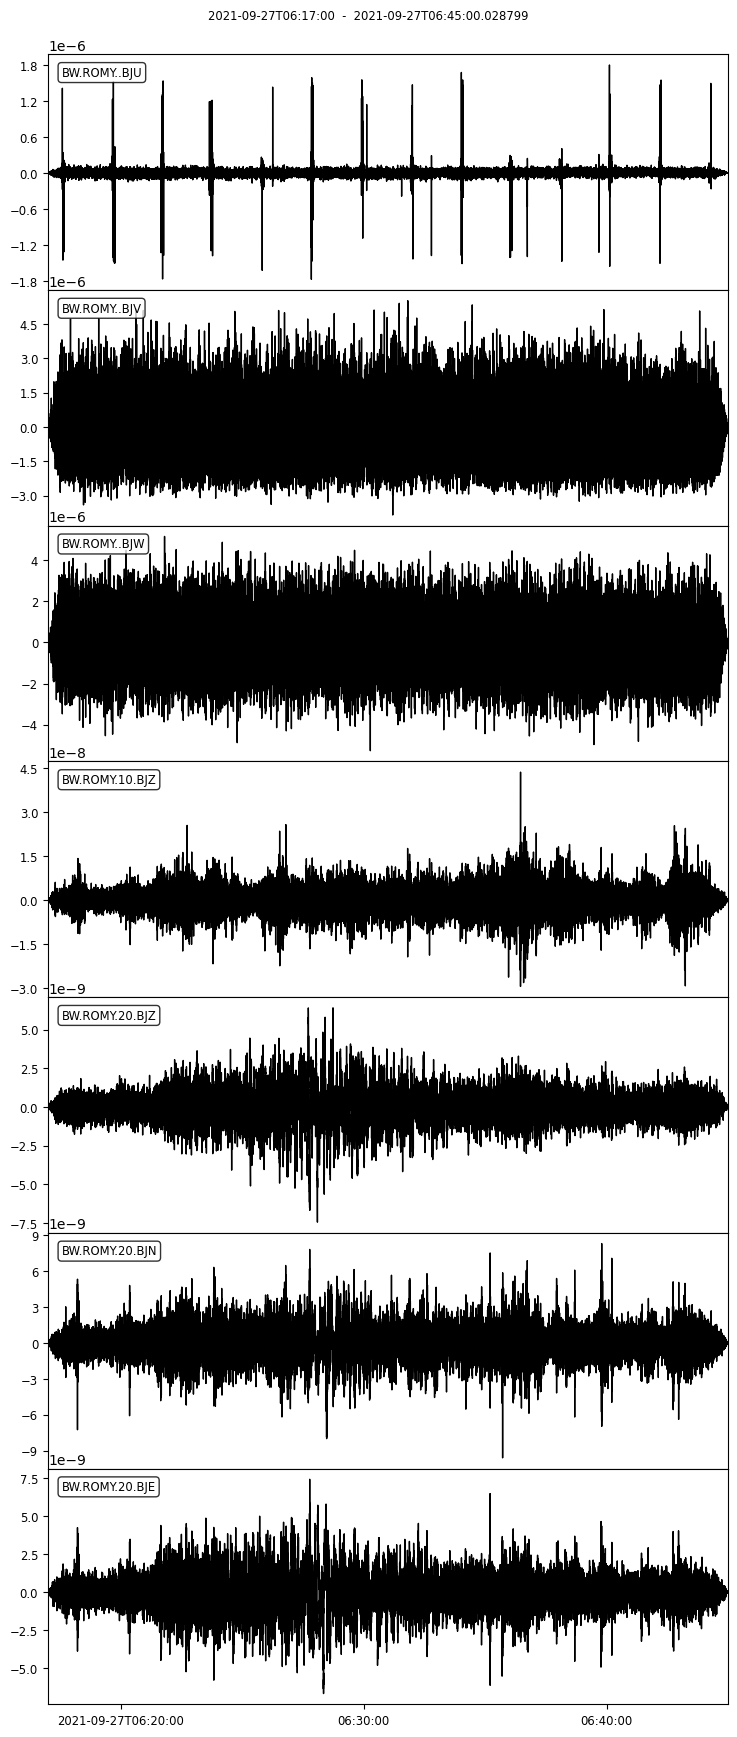

In [41]:
st1 = st0.copy()

st1.remove_sensitivity(inv0)
st1.plot(equal_scale=False);



st2 = st0.copy()

st2.remove_response(inventory=inv0, output="VEL", zero_mean=True)
st2.plot(equal_scale=False);